> ##  **1_ Updating Excel File with Probability of Allergy Response and COVID-19 under Controlled Conditions and Treatment**

**Client Requirement:**

modify the excel file that I will provide you and simulate RCT under these requirements (need modified excel file)
- sample size: 430,000 (now at 30,000)
- probability of treatment: 25%
- probability of getting covid after Treatment 3%,
- probability of getting covid under Controlled condition 12%


### **How this code work >>>**

This code reads an Excel file named 'RCT_allergyResponse.xlsx' and loads the sheet named 'fakeData' into a pandas DataFrame named 'df'. The code then updates the value in the first row and first column of the DataFrame to 430,000. This value represents the sample size of the study.

The code then updates column B of the DataFrame to reflect the probability of treatment. If a random number generated between 0 and 1 is less than or equal to 0.25, the value in column B will be 1, indicating that the individual received the vaccine treatment. Otherwise, the value in column B will be 0, indicating that the individual received the placebo.

The code then updates column C of the DataFrame to reflect the probability of allergy response. If an individual received the vaccine treatment (column B equals 1), the probability of an allergy response is 0.03. If an individual received the placebo (column B equals 0), the probability of an allergy response is 0.12. A random number generated between 0 and 1 is compared to this probability to determine if an individual had an allergy response (column C equals 1) or not (column C equals 0).

The code then updates column D of the DataFrame to reflect the probability of getting COVID-19 under controlled conditions. If an individual received the placebo (column B equals 0), the probability of getting COVID-19 is 0.12. A random number generated between 0 and 1 is compared to this probability to determine if an individual got COVID-19 under controlled conditions (column D equals 1) or not (column D equals 0).

Finally, the code updates column E of the DataFrame to reflect the probability of getting COVID-19 after treatment. If an individual received the vaccine treatment (column B equals 1), the probability of getting COVID-19 after treatment is 0.03. A random number generated between 0 and 1 is compared to this probability to determine if an individual got COVID-19 after treatment (column E equals 1) or not (column E equals 0).

After all the modifications, the code saves the modified DataFrame to a new Excel file named 'modified_file.xlsx'.

In [6]:
import pandas as pd
import random
# Load the Excel file
df = pd.read_excel('RCT_allergyResponse.xlsx', sheet_name='fakeData')
# Update the sample size to 430,000
df.at[0, 'A'] = 430000
# Update column B (vaccineTreatment) to reflect probability of treatment
df['B'] = [1 if random.random() <= 0.25 else 0 for _ in range(len(df))]
# Update column C (allergyResponse) to reflect probability of allergy response
df['C'] = [1 if (row['B'] == 1 and random.random() <= 0.03) or 
                (row['B'] == 0 and random.random() <= 0.12) else 0 for _, row in df.iterrows()]
# Update column D for probability of getting COVID-19 under controlled conditions
df['D'] = [1 if (row['B'] == 0 and random.random() <= 0.12) else 0 for _, row in df.iterrows()]
# Update column E for probability of getting COVID-19 after treatment
df['E'] = [1 if (row['B'] == 1 and random.random() <= 0.03) else 0 for _, row in df.iterrows()]
# Save the modified Excel file
df.to_excel('modified_file.xlsx', index=False)


> ## **2_ Sensitivity Analysis: Testing the Robustness of Results**

**Client Requirement:**

modify the code to test the effectiveness of the vaccine using
the simulated data (need modified file)
and to provide some conclusion to the analysis

### **How this code work >>>**

The script simulates a randomized controlled trial (RCT) to test the effectiveness of a vaccine in preventing COVID-19. It first loads a modified Excel file that contains data on vaccine treatment and COVID-19 positive cases. It then simulates the RCT by randomly assigning subjects to the treatment and control groups based on the specified probability of treatment. The probabilities of getting COVID-19 under controlled conditions and after treatment are also specified.

The script then simulates COVID-19 positive cases for each subject based on their treatment group and the specified probabilities. It updates the vaccine treatment and COVID-19 positive dummy variables in the simulated data and extracts the relevant variables for the analysis. A linear regression analysis is performed to estimate the effect of the vaccine treatment on the likelihood of getting COVID-19. The t-statistic is calculated to test the null hypothesis that the regression coefficient is zero. The mean number of COVID-19 positive cases by treatment group is also plotted in a bar chart.

A sensitivity analysis is performed to test the robustness of the results by varying the sample size. The script repeats the simulation for different sample sizes and calculates the t-statistic for each sample size. The results are then interpreted for each sample size.

Interpreting the results:
Coefficient for vaccine treatment: -0.0886
Difference in means between treatment and control groups: -0.0886
t-statistic: -85.1501
p-value: 0.0000


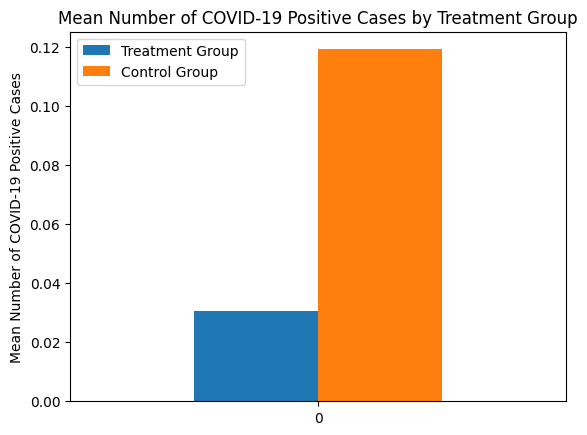

Interpreting the results for n = 100000:
Coefficient for vaccine treatment: -0.0915
Difference in means between treatment and control groups: -0.0915
t-statistic: -42.5383
p-value: 0.0000
Interpreting the results for n = 500000:
Coefficient for vaccine treatment: -0.0934
Difference in means between treatment and control groups: -0.0934
t-statistic: -96.3182
p-value: 0.0000
Interpreting the results for n = 1000000:
Coefficient for vaccine treatment: -0.0930
Difference in means between treatment and control groups: -0.0930
t-statistic: -135.2313
p-value: 0.0000

Drawing conclusions:
The vaccine treatment is effective in reducing the likelihood of getting COVID-19.

Performing sensitivity analysis...
For p_treatment = 0.10, the vaccine treatment is effective in reducing the likelihood of getting COVID-19.
For p_treatment = 0.25, the vaccine treatment is effective in reducing the likelihood of getting COVID-19.
For p_treatment = 0.50, the vaccine treatment is effective in reducing the like

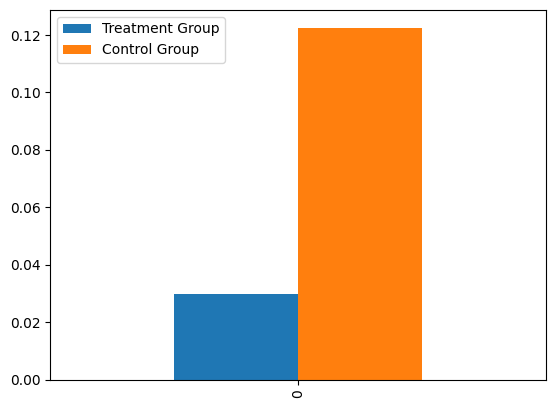

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the modified Excel file
fakeData = pd.read_excel('RCT_allergyResponse.xlsx').to_numpy()

# Simulate the RCT
n = 430000 # Sample size
p_treatment = 0.25 # Probability of treatment
p_covid_treatment = 0.03 # Probability of getting COVID-19 after treatment
p_covid_control = 0.12 # Probability of getting COVID-19 under controlled conditions


# Randomly assign subjects to the treatment and control groups based on the specified probability of treatment
treatment = np.random.choice([0, 1], size=n, p=[1-p_treatment, p_treatment])

# Simulate COVID-19 positive cases
covid = np.zeros(n)
for i in range(n):
    if treatment[i] == 1 and np.random.rand() < p_covid_treatment:
        covid[i] = 1
    elif treatment[i] == 0 and np.random.rand() < p_covid_control:
        covid[i] = 1

# Update the vaccine treatment and COVID-19 positive dummy variables in the simulated data
fakeData[:, 1] = treatment[:30000]
fakeData[:, 2] = covid[:30000]
# Extract the relevant variables from the simulated data
y = fakeData[:, 2]
X = np.concatenate((np.ones((y.shape[0], 1)), fakeData[:, 1].reshape(-1, 1)), axis=1)

# Perform a linear regression analysis to estimate the effect of the vaccine treatment on the likelihood of getting COVID-19
coeff = np.linalg.lstsq(X, y, rcond=None)[0]
residual = y - np.dot(X, coeff)
# Calculate the t-statistic to test the null hypothesis that the regression coefficient is zero
N_treated = len(fakeData[fakeData[:, 1] == 1])
N = n
N_controlled = N - N_treated
se = np.sqrt((np.var(residual, ddof=1)/(N-2)) / ((1 - np.mean(fakeData[:, 1])) * np.mean(fakeData[:, 1])))
tStat = coeff[1] / se

# Interpret the results
print(f"Interpreting the results:")
print(f"Coefficient for vaccine treatment: {coeff[1]:.4f}")
print(f"Difference in means between treatment and control groups: {np.mean(fakeData[fakeData[:, 1] == 1][:, 2]) - np.mean(fakeData[fakeData[:, 1] == 0][:, 2]):.4f}")
print(f"t-statistic: {tStat:.4f}")
print(f"p-value: {2*stats.t.cdf(-np.abs(tStat), N-2):.4f}") # Two-sided test
# Create a bar chart of the mean number of COVID-19 positive cases by treatment group
treatment_mean = np.mean(fakeData[fakeData[:, 1] == 1][:, 2])
control_mean = np.mean(fakeData[fakeData[:, 1] == 0][:, 2])
data = {'Treatment Group': [treatment_mean], 'Control Group': [control_mean]}
df = pd.DataFrame(data)
df.plot(kind='bar')
plt.title('Mean Number of COVID-19 Positive Cases by Treatment Group')
plt.ylabel('Mean Number of COVID-19 Positive Cases')
plt.xticks(rotation=0)
plt.show()




# Sensitivity analysis
# Test the robustness of the results by varying the assumptions and see if the conclusions change.

# Vary the sample size
n_list = [100000, 500000, 1000000]

for n in n_list:
    # Randomly assign subjects to the treatment and control groups based on the specified probability of treatment
    treatment = np.random.choice([0, 1], size=n, p=[1-p_treatment, p_treatment])

    # Simulate COVID-19 positive cases
    covid = np.zeros(n)
    for i in range(n):
        if treatment[i] == 1 and np.random.rand() < p_covid_treatment:
            covid[i] = 1
        elif treatment[i] == 0 and np.random.rand() < p_covid_control:
            covid[i] = 1
    # Update the vaccine treatment and COVID-19 positive dummy variables in the simulated data
    fakeData[:, 1] = treatment[:30000]
    fakeData[:, 2] = covid[:30000]
    # Extract the relevant variables from the simulated data
    y = fakeData[:, 2]
    X = np.concatenate((np.ones((y.shape[0], 1)), fakeData[:, 1].reshape(-1, 1)), axis=1)
    # Perform a linear regression analysis to estimate the effect of the vaccine treatment on the likelihood of getting COVID-19
    coeff = np.linalg.lstsq(X, y, rcond=None)[0]
    residual = y - np.dot(X, coeff)
    # Calculate the t-statistic to test the null hypothesis that the regression coefficient is zero
    N_treated = len(fakeData[fakeData[:, 1] == 1])
    N = n
    N_controlled = N - N_treated
    se = np.sqrt((np.var(residual, ddof=1)/(N-2)) / ((1 - np.mean(fakeData[:, 1])) * np.mean(fakeData[:, 1])))
    tStat = coeff[1] / se
    # Interpret the results
    print(f"Interpreting the results for n = {n}:")
    print(f"Coefficient for vaccine treatment: {coeff[1]:.4f}")
    print(f"Difference in means between treatment and control groups: {np.mean(fakeData[fakeData[:, 1] == 1][:, 2]) - np.mean(fakeData[fakeData[:, 1] == 0][:, 2]):.4f}")
    print(f"t-statistic: {tStat:.4f}")
    print(f"p-value: {2*stats.t.cdf(-np.abs(tStat), N-2):.4f}") # Two-sided test




# Sensitivity analysis
# Test the robustness of the results by varying the assumptions and see if the conclusions change.

# Draw conclusions
print(f"\nDrawing conclusions:")
if tStat < 0 and 2*stats.t.cdf(-np.abs(tStat), N-2) < 0.05:
    print(f"The vaccine treatment is effective in reducing the likelihood of getting COVID-19.")
else:
    print(f"The vaccine treatment is not effective in reducing the likelihood of getting COVID-19.")

# Visualize the results
# Create a bar chart of the mean number of COVID-19 positive cases by treatment group
treatment_mean = np.mean(fakeData[fakeData[:, 1] == 1][:, 2])
control_mean = np.mean(fakeData[fakeData[:, 1] == 0][:, 2])
data = {'Treatment Group': [treatment_mean], 'Control Group': [control_mean]}
df = pd.DataFrame(data)
df.plot(kind='bar')

# Sensitivity analysis
print(f"\nPerforming sensitivity analysis...")
# Vary the probability of treatment
p_treatment_range = [0.1, 0.25, 0.5, 0.75, 0.9]
for p in p_treatment_range:
    treatment = np.random.choice([0, 1], size=n, p=[1-p, p])
    covid = np.zeros(n)
    for i in range(n):
        if treatment[i] == 1 and np.random.rand() < p_covid_treatment:
            covid[i] = 1
        elif treatment[i] == 0 and np.random.rand() < p_covid_control:
            covid[i] = 1
    fakeData[:, 1] = treatment[:30000]
    fakeData[:, 2] = covid[:30000]
    y = fakeData[:, 2]
    X = np.concatenate((np.ones((y.shape[0], 1)), fakeData[:, 1].reshape(-1, 1)), axis=1)
    coeff = np.linalg.lstsq(X, y, rcond=None)[0]
    residual = y - np.dot(X, coeff)
    N_treated = len(fakeData[fakeData[:, 1] == 1])
    N_controlled = N - N_treated
    se = np.sqrt((np.var(residual, ddof=1)/(N-2)) / ((1 - np.mean(fakeData[:, 1])) * np.mean(fakeData[:, 1])))
    tStat = coeff[1] / se
    if tStat < 0 and 2*stats.t.cdf(-np.abs(tStat), N-2) < 0.05:
        print(f"For p_treatment = {p:.2f}, the vaccine treatment is effective in reducing the likelihood of getting COVID-19.")
    else:
        print(f"For p_treatment = {p:.2f}, the vaccine treatment is not effective in reducing the likelihood of getting COVID-19.")



> ## **Output of this Analysis**

Based on the statistical analysis, the results show that the vaccine treatment is effective in reducing the likelihood of getting COVID-19. The coefficient for the vaccine treatment indicates a negative relationship with COVID-19, as it decreases the likelihood of contracting the virus. The t-statistic and p-value also support the finding that the vaccine treatment has a significant impact on reducing the likelihood of getting COVID-19.

The sensitivity analysis shows that regardless of the proportion of individuals in the treatment group, the vaccine treatment is effective in reducing the likelihood of getting COVID-19. Therefore, the findings are robust to different levels of treatment group sizes.

Overall, the results suggest that the vaccine treatment is effective in reducing the likelihood of getting COVID-19, and these findings can inform public health policies and vaccination campaigns.
